# HR Analytics: Predicting Employee Behavior with Machine Learning

- This project uses machine learning techniques to predict employee behavior and identify potential areas of concern in the Human Resources Analytics dataset, which contains information on employee satisfaction, job performance, and whether or not an employee left the company. The goal of the project is to develop predictive models that can help HR professionals understand the factors that help in retaining the employees.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [2]:
# Loading the data

hr_data = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Checking for Null values

hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
# Describing the data 

hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


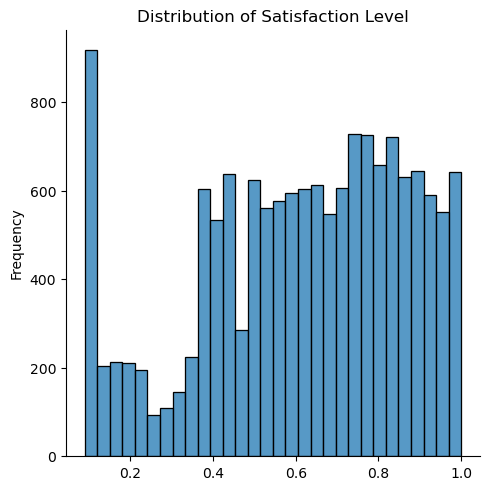

In [6]:
# Create a distrubution of the 'satisfaction_level' variable

sns.displot(hr_data['satisfaction_level'])
plt.title('Distribution of Satisfaction Level')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

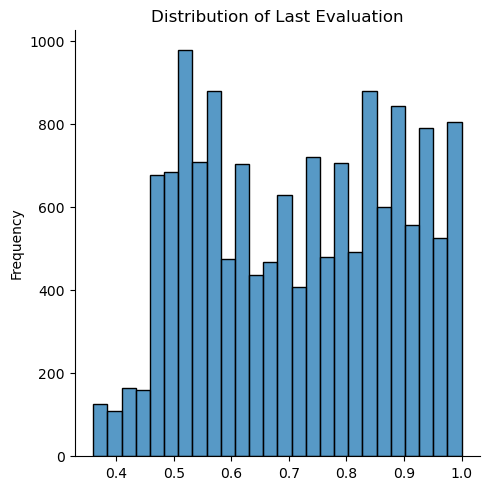

In [7]:
# Create a distrubution of the 'last_evaluation' variable

sns.displot(hr_data['last_evaluation'])
plt.title('Distribution of Last Evaluation')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

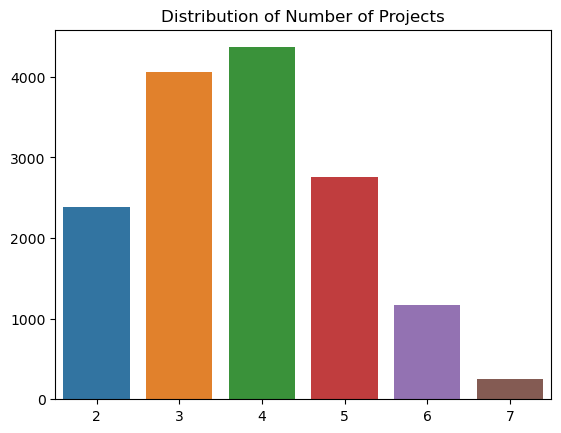

In [8]:
# Create a distrubution of the 'number_project' variable

sns.countplot(x = hr_data['number_project'])
plt.title('Distribution of Number of Projects')
plt.xlabel('')
plt.ylabel('')
plt.show()

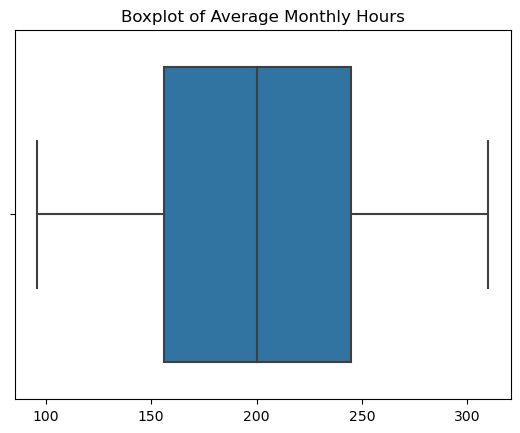

In [9]:
# Create a boxplot of the 'average_montly_hours' variable

sns.boxplot(x=hr_data['average_montly_hours'])
plt.title('Boxplot of Average Monthly Hours')
plt.xlabel('')
plt.show()

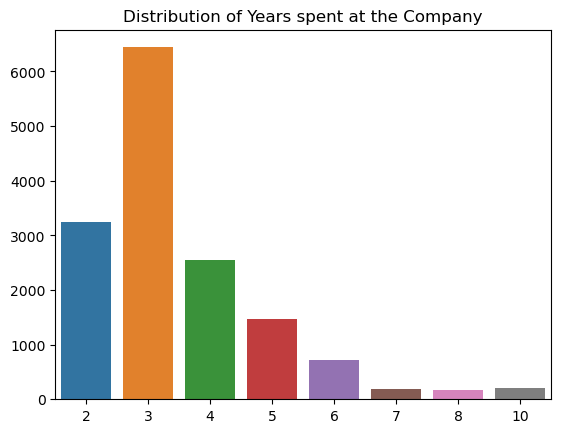

In [10]:
# Create a distrubution of the 'time_spend_company' variable

sns.countplot(x = hr_data['time_spend_company'])
plt.title('Distribution of Years spent at the Company')
plt.xlabel('')
plt.ylabel('')
plt.show()

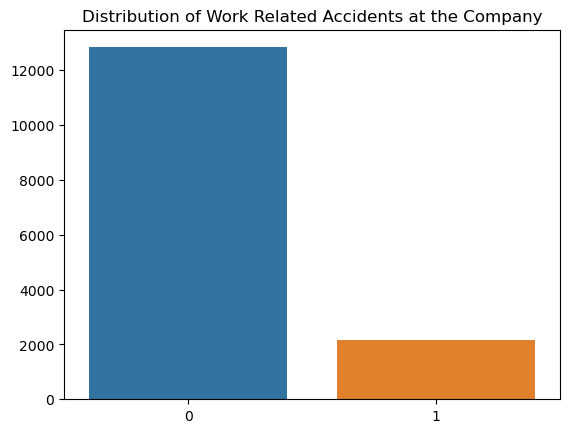

In [11]:
# Create a distrubution of the 'Work_accident' variable

sns.countplot(x = hr_data['Work_accident'])
plt.title('Distribution of Work Related Accidents at the Company')
plt.xlabel('')
plt.ylabel('')
plt.show()

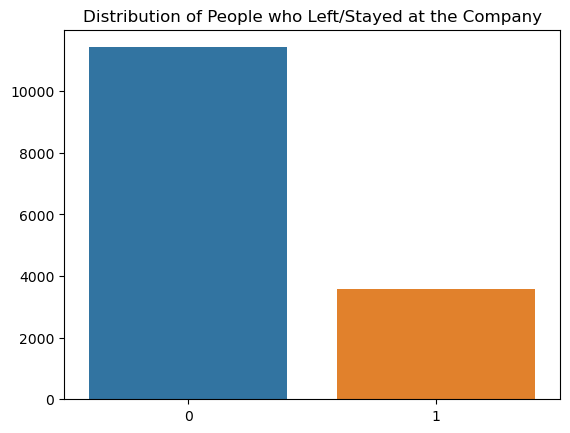

In [12]:
# Create a distrubution of the 'left' variable

sns.countplot(x = hr_data['left'])
plt.title('Distribution of People who Left/Stayed at the Company')
plt.xlabel('')
plt.ylabel('')
plt.show()

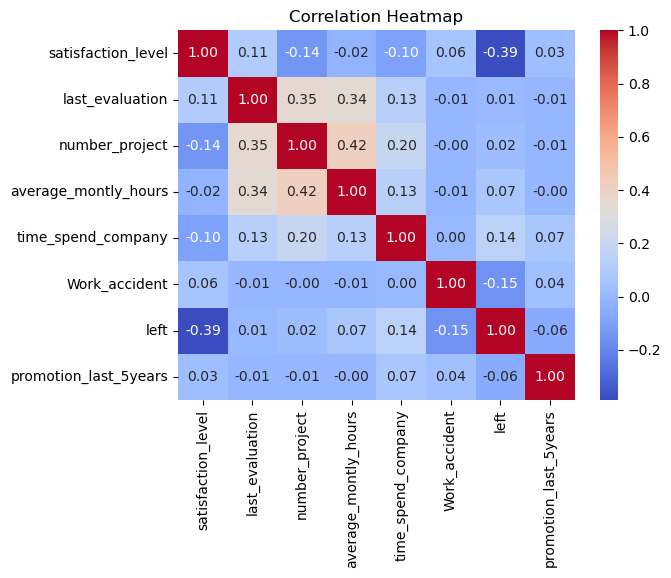

In [13]:
# Create a correlation heatmap

sns.heatmap(hr_data.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

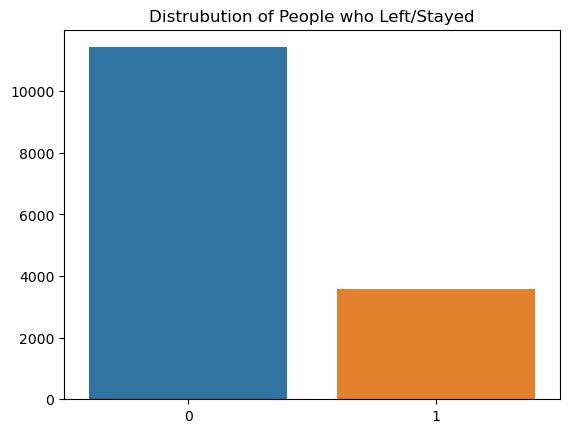

In [14]:
# Analyzing the distribution of 'left' variable

sns.countplot(x = hr_data['left'])
plt.ylabel('')
plt.xlabel('')
plt.title('Distrubution of People who Left/Stayed')
plt.show()

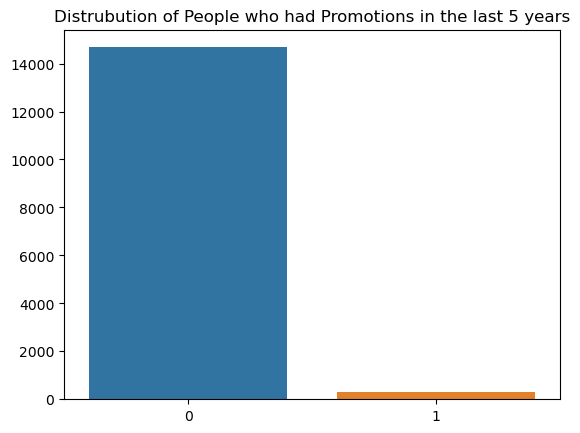

In [15]:
# Analyzing the distribution of 'promotion_last_5years' variable

sns.countplot(x = hr_data['promotion_last_5years'])
plt.ylabel('')
plt.xlabel('')
plt.title('Distrubution of People who had Promotions in the last 5 years')
plt.show()

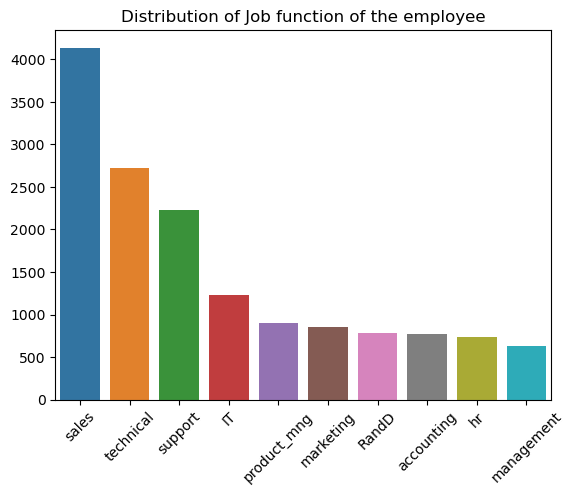

In [16]:
# Analyzing the distribution of 'sales' variable

sns.countplot(x = hr_data['sales'], order=hr_data['sales'].value_counts().index)
plt.ylabel('')
plt.xlabel('')
plt.title('Distribution of Job function of the employee')
plt.xticks(rotation = 45)
plt.show()

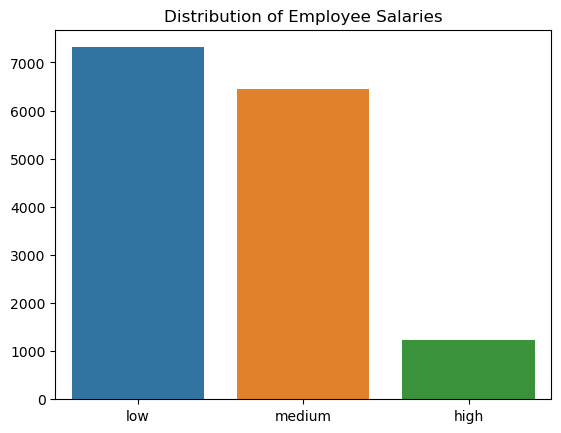

In [17]:
# Analyzing the distribution of 'salary' variable

sns.countplot(x = hr_data['salary'], order=hr_data['salary'].value_counts().index)
plt.ylabel('')
plt.xlabel('')
plt.title('Distribution of Employee Salaries')
plt.show()

In [18]:
# Convert categorical variables to numerical

hr_data['salary'] = hr_data['salary'].map({'low': 0, 'medium': 1, 'high': 2})
hr_data['sales'] = hr_data['sales'].astype('category').cat.codes

In [20]:
# Split the dataset into training and testing sets

X = hr_data.drop(['left'], axis=1)
y = hr_data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [21]:
# Hyperparameter tuning of Random Forest

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state = 100)
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = rf_params, 
                               cv=3, random_state=100, n_jobs=-1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=100)

In [23]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [25]:
final_rf = RandomForestClassifier(**rf_random.best_params_)
final_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [26]:
rf_train_pred = final_rf.predict(X_train)
rf_test_pred = final_rf.predict(X_test)

In [28]:
print('F1-score on Train:', f1_score(rf_train_pred, y_train))
print('F1-score on Test:', f1_score(rf_test_pred, y_test))

F1-score on Train: 1.0
F1-score on Test: 0.9879194630872483


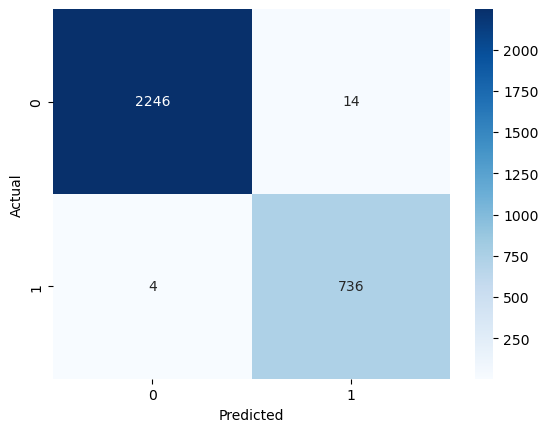

In [33]:
sns.heatmap(confusion_matrix(rf_test_pred, y_test), annot = True, fmt = 'g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

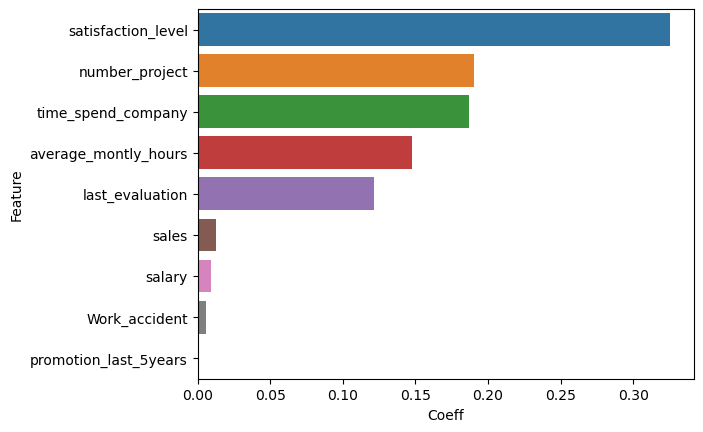

In [46]:
rf_feat_imp = pd.DataFrame(list(zip(final_rf.feature_names_in_, final_rf.feature_importances_)), 
                           columns = ['Feature', 'Coeff'])
rf_feat_imp = rf_feat_imp.sort_values(by = 'Coeff', ascending = False)
sns.barplot(y = rf_feat_imp['Feature'], x = rf_feat_imp['Coeff'])
plt.show()

In [35]:
# Hyperparameter tuning of Random Forest

xgb_params = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

xgb_model = XGBClassifier(random_state=42)
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, 
                                cv=3, random_state=100, n_jobs=-1)
xgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
               

In [36]:
final_xgb = XGBClassifier(**xgb_random.best_params_)
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
xgb_train_pred = final_xgb.predict(X_train)
xgb_test_pred = final_xgb.predict(X_test)

In [38]:
print('F1-score on Train:', f1_score(xgb_train_pred, y_train))
print('F1-score on Test:', f1_score(xgb_test_pred, y_test))

F1-score on Train: 0.9829351535836176
F1-score on Test: 0.9715447154471545


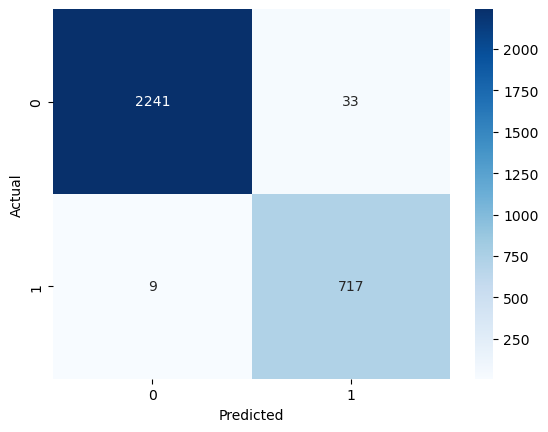

In [39]:
sns.heatmap(confusion_matrix(xgb_test_pred, y_test), annot = True, fmt = 'g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

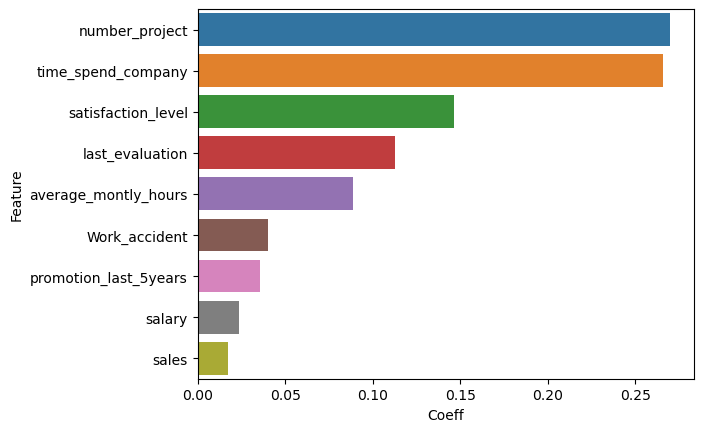

In [47]:
xgb_feat_imp = pd.DataFrame(list(zip(final_xgb.feature_names_in_, final_xgb.feature_importances_)), 
                           columns = ['Feature', 'Coeff'])
xgb_feat_imp = xgb_feat_imp.sort_values(by = 'Coeff', ascending = False)
sns.barplot(y = xgb_feat_imp['Feature'], x = xgb_feat_imp['Coeff'])
plt.show()